# **GlucoSense- AI-Powered Diabetes Detection for Early Intervention**

---
# **Project Overview**

This project aims to build a machine-learning model that classifies individuals as diabetic or non-diabetic based on early medical indicators. The dataset used for this analysis is the Early Diabetes Classification Dataset from Kaggle, which includes key health features such as glucose levels, BMI, age, and insulin levels. The goal is to predict the likelihood of an individual developing diabetes, providing a valuable tool for early intervention and risk assessment.


---
# Objective
The main objectives of the project are:

Data Collection and Preprocessing: Gather and clean the dataset to ensure it's suitable for model training.

Model Development: Apply various machine learning algorithms to predict diabetes status.

Model Evaluation: Assess the performance of the models using evaluation metrics such as accuracy, precision, recall, and F1-score.

Feature Importance: Identify the most significant factors contributing to diabetes risk.

---

#Importing Libraries



In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Dataset Inserion
insetion of the dataset obtained from kaggle.com and cleaning it to maipulate the required data values

In [129]:
import pandas as pd

# Assuming your data is in a CSV file named 'your_data.csv'
df = pd.read_csv('/content/Glcosense final dataset.csv')

# Remove rows where the 'class' column has a value of 0
df = df[df['class'] != 0]

# Optional: Save the cleaned DataFrame back to a CSV file
df.to_csv('cleaned_data.csv', index=False)

# Display the first few rows of the cleaned DataFrame
print(df.head())


   age gender  polyuria  polydipsia  sudden_weight_loss  weakness  polyphagia  \
0   40   Male         0           1                   0         1           0   
1   58   Male         0           0                   0         1           0   
2   41   Male         1           0                   0         1           1   
3   45   Male         0           0                   1         1           1   
4   60   Male         1           1                   1         1           1   

   genital_thrush  visual_blurring  itching  irritability  delayed_healing  \
0               0                0        1             0                1   
1               0                1        0             0                0   
2               0                0        1             0                1   
3               1                0        1             0                1   
4               0                1        1             1                1   

   partial_paresis  muscle_stiffness  alopec

In [130]:
df = pd.read_csv('/content/cleaned_data.csv')


In [131]:
df.describe()

,age,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.0
mean,49.071875,0.759375,0.703125,0.587500,0.681250,0.590625,0.259375,0.546875,0.481250,0.343750,0.478125,0.600000,0.421875,0.243750,0.190625,1.0
std,12.097481,0.428132,0.457597,0.493055,0.466722,0.492489,0.438978,0.498578,0.500431,0.475703,0.500304,0.490665,0.494632,0.430016,0.393409,0.0
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,39.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.0
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 320 non-null    int64 
 1   gender              320 non-null    object
 2   polyuria            320 non-null    int64 
 3   polydipsia          320 non-null    int64 
 4   sudden_weight_loss  320 non-null    int64 
 5   weakness            320 non-null    int64 
 6   polyphagia          320 non-null    int64 
 7   genital_thrush      320 non-null    int64 
 8   visual_blurring     320 non-null    int64 
 9   itching             320 non-null    int64 
 10  irritability        320 non-null    int64 
 11  delayed_healing     320 non-null    int64 
 12  partial_paresis     320 non-null    int64 
 13  muscle_stiffness    320 non-null    int64 
 14  alopecia            320 non-null    int64 
 15  obesity             320 non-null    int64 
 16  class               320 no

In [133]:
print(df.columns.tolist())

['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring', 'itching', 'irritability', 'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity', 'class']


# Checking for missing values

In [134]:
df.isnull().sum()

,0
age,0
gender,0
polyuria,0
polydipsia,0
sudden_weight_loss,0
weakness,0
polyphagia,0
genital_thrush,0
visual_blurring,0
itching,0


# Removing Duplicates

In [135]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
# Drop duplicates if they exist
if duplicates > 0:
    data = df.drop_duplicates()
    print("Duplicates removed.")
else:
    print("No duplicates found.")

Number of duplicate rows: 147
Duplicates removed.


# Graphs

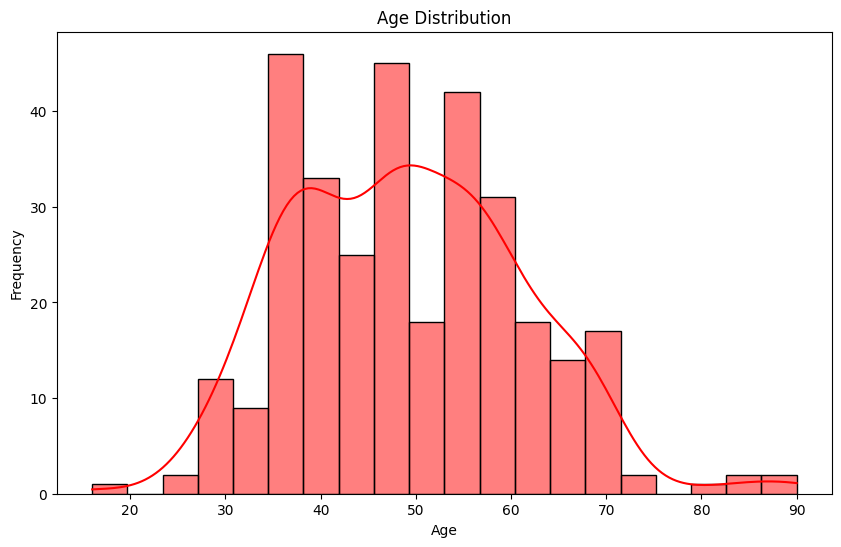

In [136]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=20, color='red')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of Diabetes by Gender

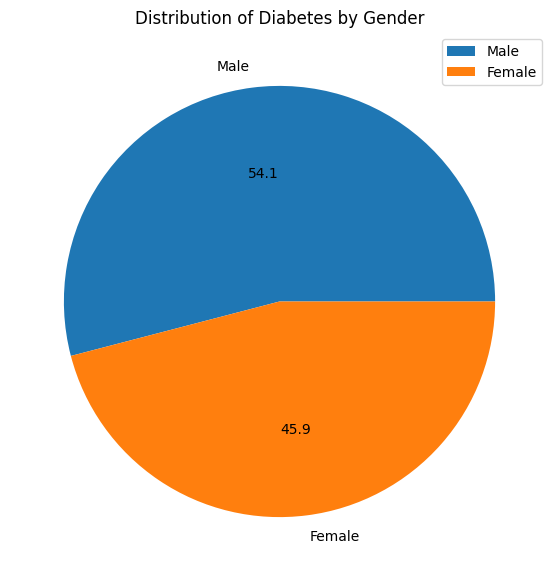

In [137]:
gender_diabetes_counts = df[df['class'] == 1]['gender'].value_counts()
plt.figure(figsize=(9, 7))
plt.pie(gender_diabetes_counts, labels=["Male","Female"], autopct='%1.1f')
plt.title('Distribution of Diabetes by Gender')
plt.legend()
plt.show()

The resulting pie chart visually represents the proportion of male and female diabetic patients in your dataset. Each slice of the pie will be labeled as "Male" or "Female" and show the percentage of diabetic patients that each gender represents.

This helps you quickly understand the gender distribution among the diabetic patients in your dataset. If, for example, the chart shows that 45.9% of the diabetic patients are female and 54.1% are male, it visually communicates this distribution clearly and effectively.

# Bar chart

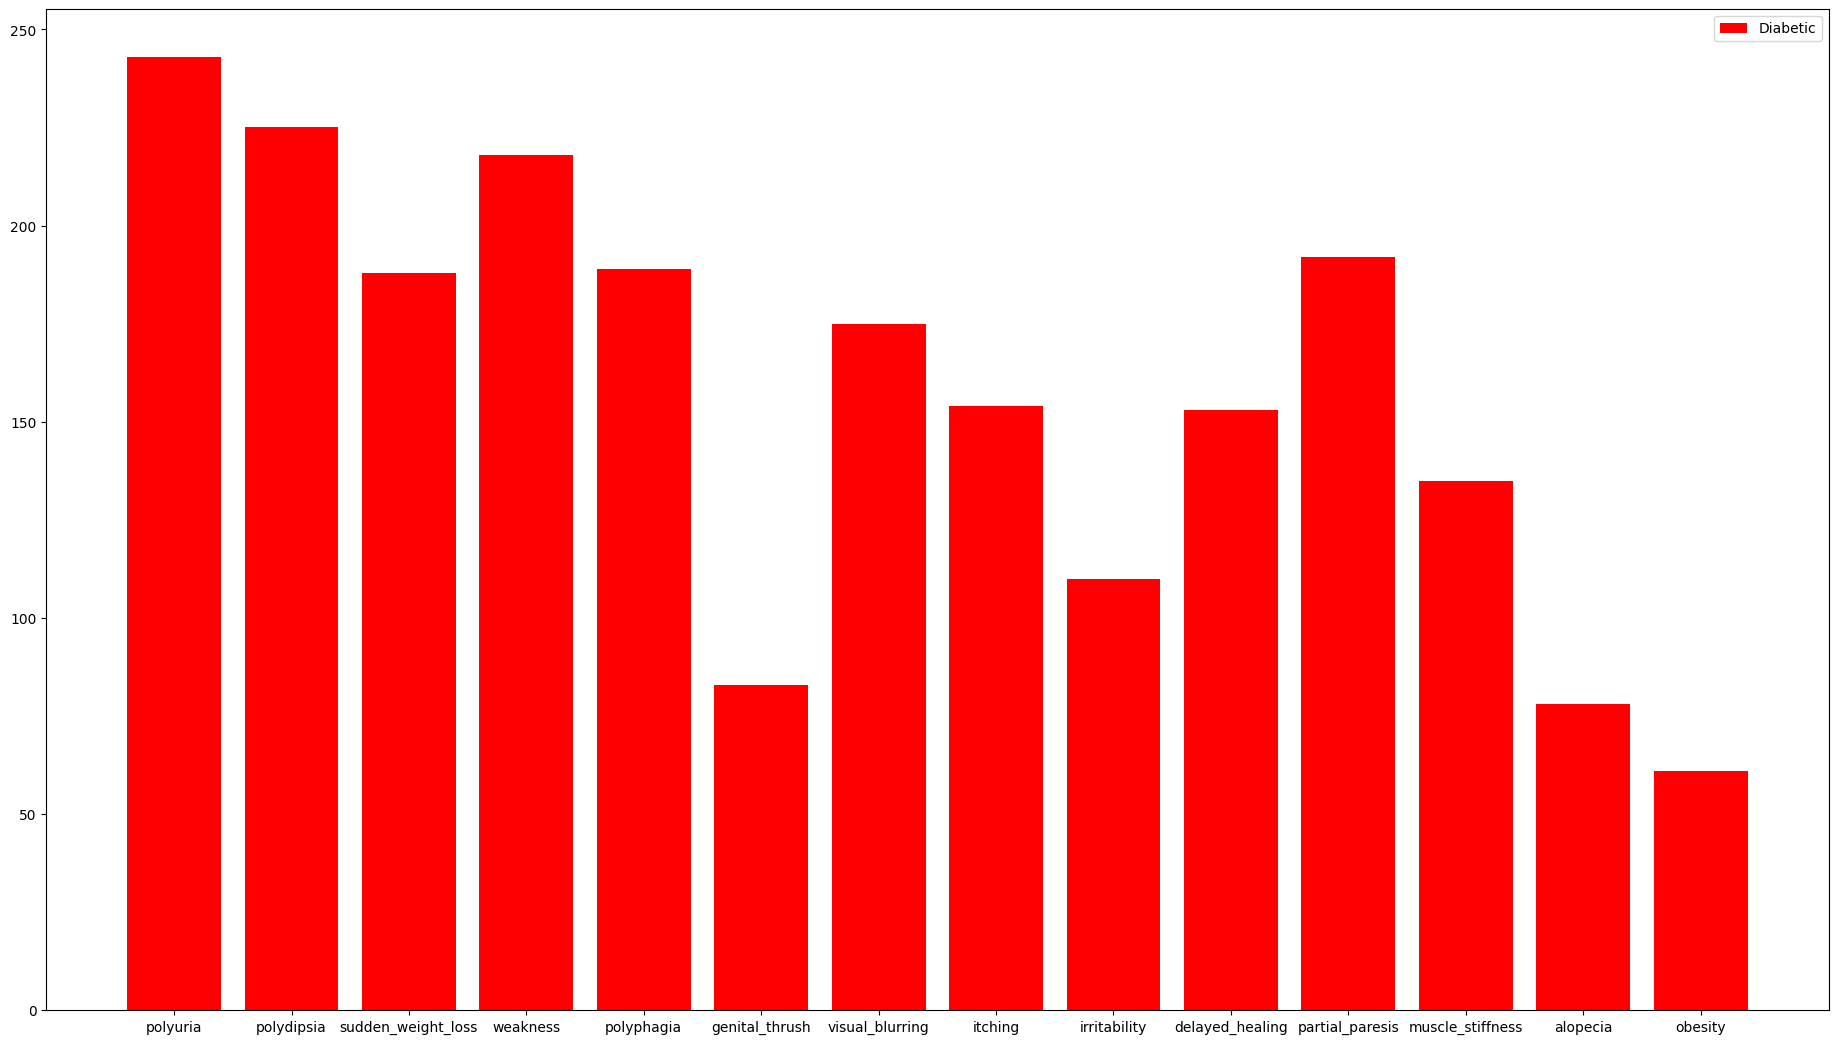

In [138]:
symptoms = df.columns[2:-1]
count_0 = df[df['class'] == 0][symptoms].sum()
count_1 = df[df['class'] == 1][symptoms].sum()
plt.figure(figsize=(23, 13))
#plt.bar(symptoms, count_0, label='Non-Diabetic', color='green')
plt.bar(symptoms, count_1, bottom=count_0, label='Diabetic', color='red')
plt.legend()

The resulting bar chart shows the distribution of different symptoms across diabetic patients. Each bar represents a symptom, with the height of the bar corresponding to the total count of that symptom in diabetic patients. The bottom (commented out part) would represent the non-diabetic counts, if plotted.

This visualization helps to compare how frequently each symptom occurs in diabetic patients relative to non-diabetic patients, providing a clear and intuitive comparison of symptom prevalence.

# Bivariate Analysis

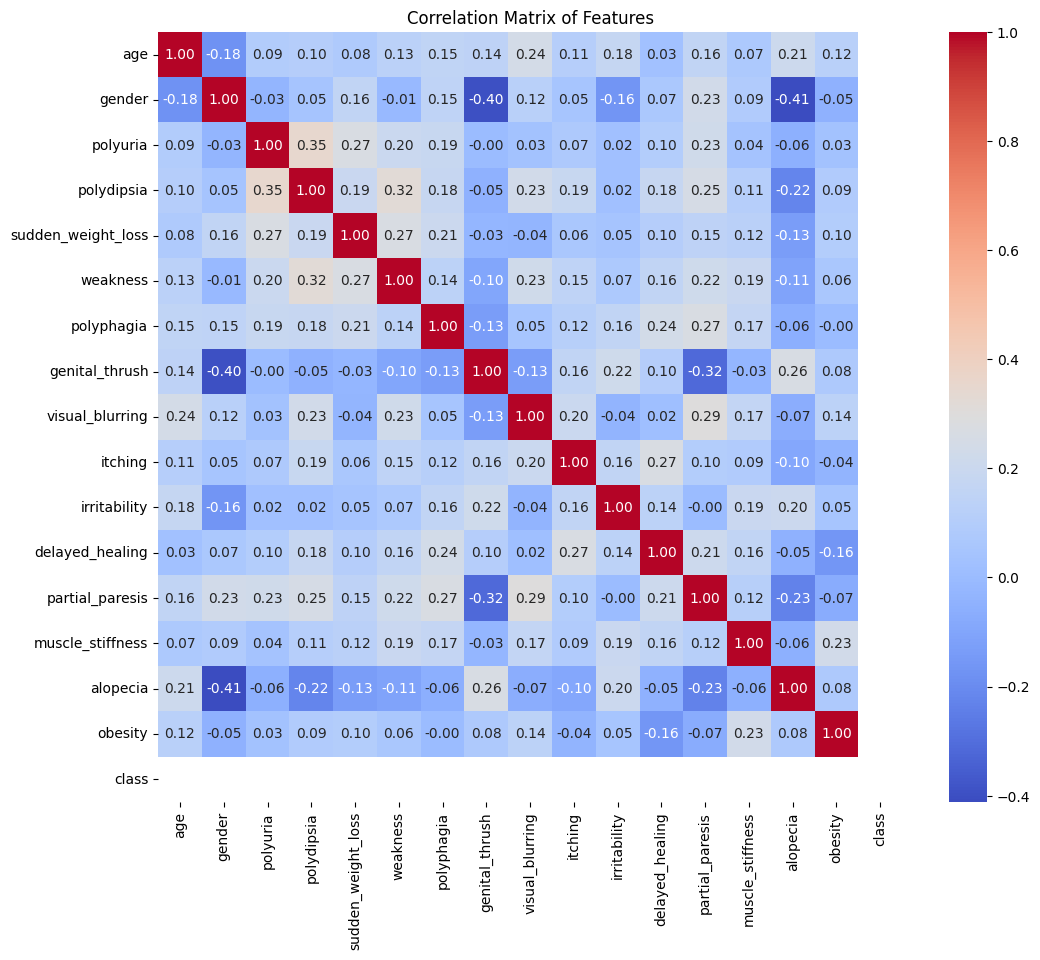

In [139]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

The resulting heatmap visually represents the correlation matrix of the features in your DataFrame. Each cell in the heatmap shows the correlation coefficient between two features, making it easy to see which features are positively or negatively correlated with each other.

For instance:

Strong Positive Correlation: Features with a coefficient close to 1 are strongly positively correlated.

Strong Negative Correlation: Features with a coefficient close to -1 are strongly negatively correlated.

No Correlation: Features with a coefficient close to 0 have little to no correlation.

This visualization helps to identify patterns and relationships between different variables in your dataset, which can be valuable for further analysis and modeling.

# Polyuria values

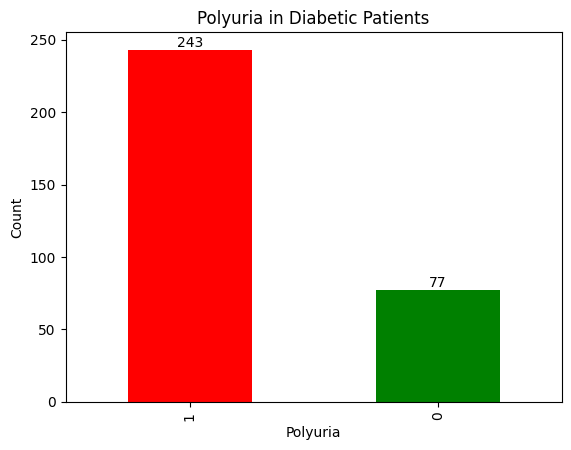

In [140]:
import matplotlib.pyplot as plt

# Count the occurrences of polyuria in diabetic patients (class = 1)
polyuria_diabetes = df[df['class'] == 1]['polyuria'].value_counts()

# Define colors for the bars
colors = ['green' if value == 0 else 'red' for value in polyuria_diabetes.index]

# Plot the bar chart with specified colors
polyuria_diabetes.plot(kind='bar', color=colors, title='Polyuria in Diabetic Patients')
plt.xlabel('Polyuria')
plt.ylabel('Count')

# Add text annotations on the bars
for i, v in enumerate(polyuria_diabetes):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom')

# Show the plot
plt.show()


The resulting bar chart will show the counts of polyuria (a symptom of excessive urination) among diabetic patients. There will be two bars:

One for patients without polyuria (value 0), colored green.

One for patients with polyuria (value 1), colored red.

This visualization helps you quickly see the prevalence of polyuria among diabetic patients in your dataset. The counts on top of each bar provide an exact number of patients for each category, making the data easy to interpret.

# Picharts for various features for Diebetic vs Non Diabetic patients

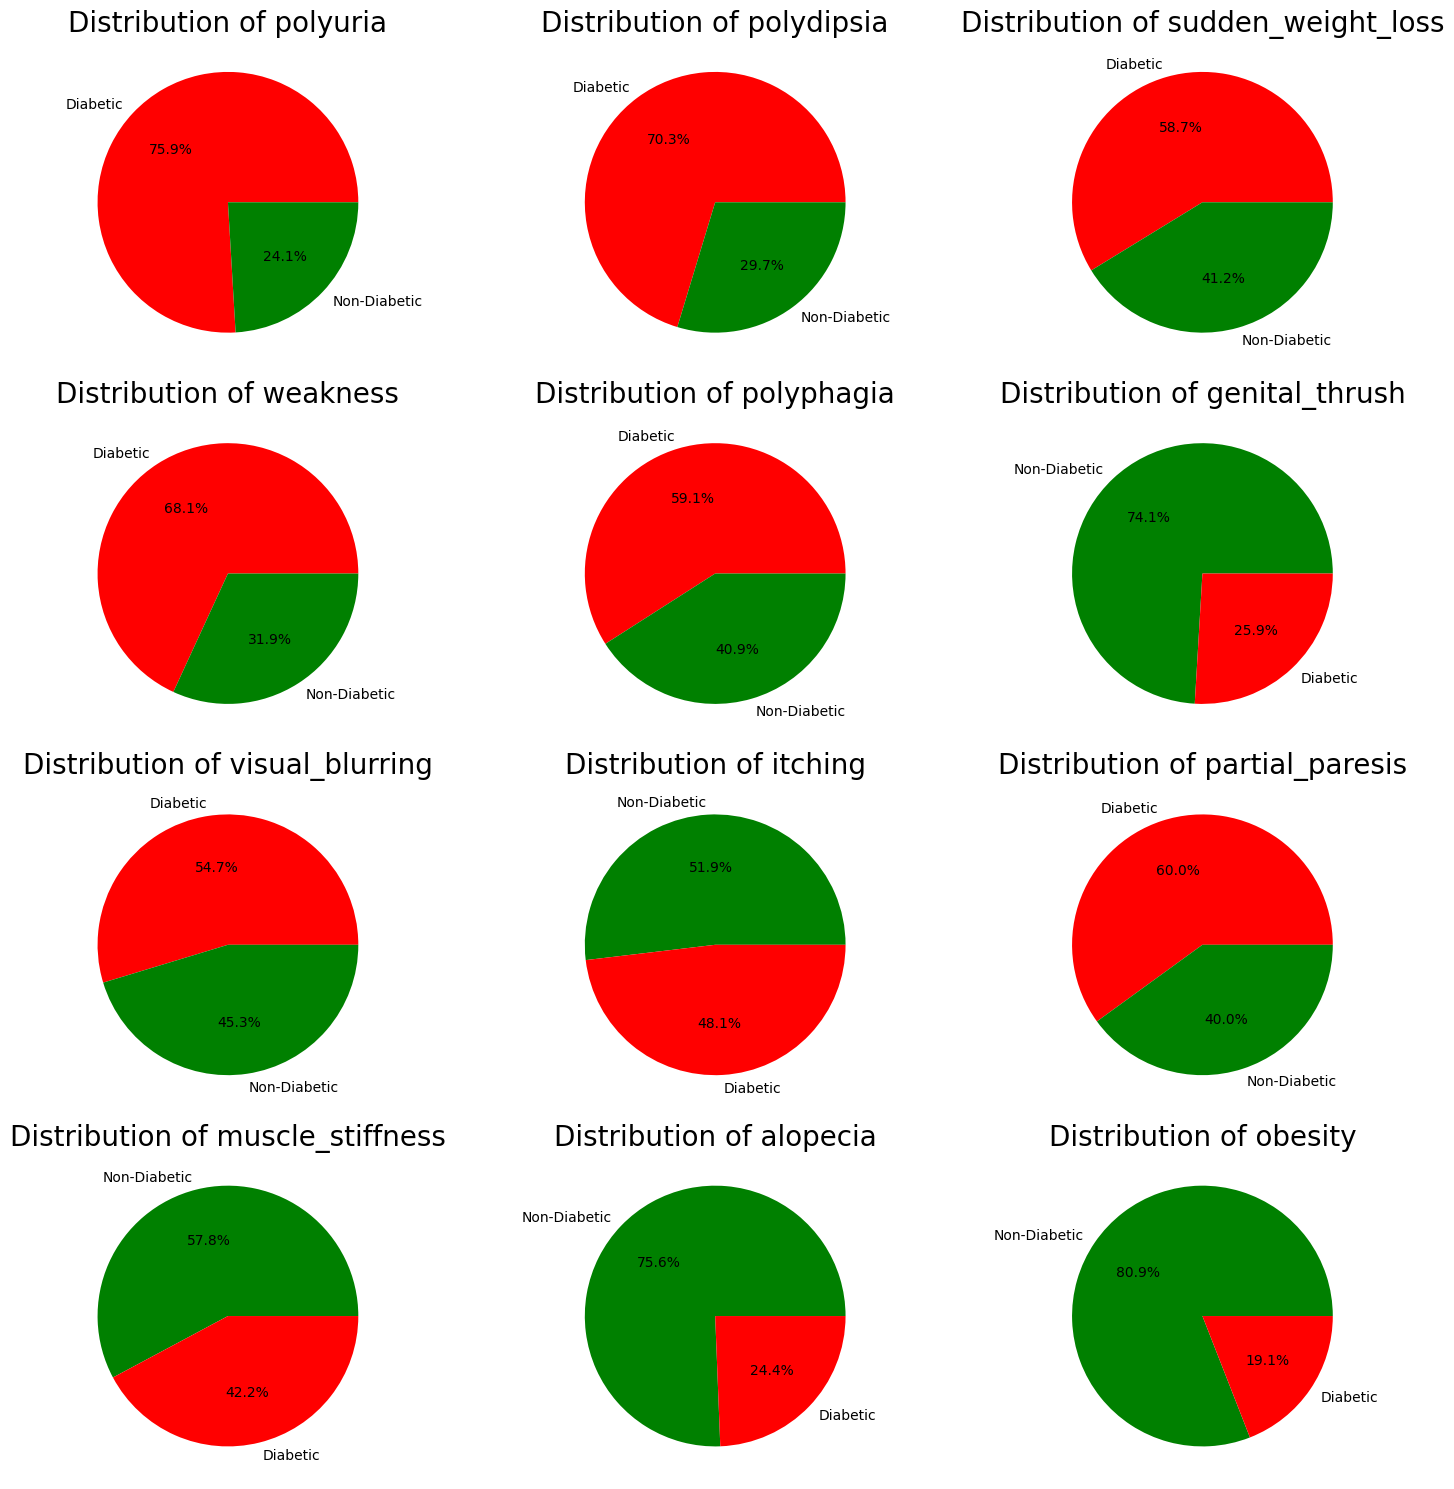

In [141]:
import matplotlib.pyplot as plt
conditions = ['polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia',
              'genital_thrush', 'visual_blurring', 'itching',
              'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity']
diabetic_df = df[df['class'] == 1]
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
axes = axes.flatten()
color_map = {1: 'red', 0: 'green'}
for i, condition in enumerate(conditions):
    diabetic_counts = diabetic_df[condition].value_counts()
    colors = [color_map[label] for label in diabetic_counts.index]

    axes[i].pie(
        diabetic_counts,
        labels=diabetic_counts.index.map({1: 'Diabetic', 0: 'Non-Diabetic'}),
        autopct='%1.1f%%',
        colors=colors
    )
    axes[i].set_title(f"Distribution of {condition}", fontsize=20)
plt.tight_layout()
plt.show()

The final output will be a 4x3 grid of pie charts, each representing the distribution of a specific condition among diabetic patients. The pie charts will show the proportion of patients with each condition (colored red) versus without each condition (colored green).

Red indicates the proportion of diabetic patients with the condition.

Green indicates the proportion of diabetic patients without the condition.

This visualization provides a clear and comprehensive view of how common each condition is among diabetic patients, helping to identify patterns and trends in the symptoms experienced by these patients.

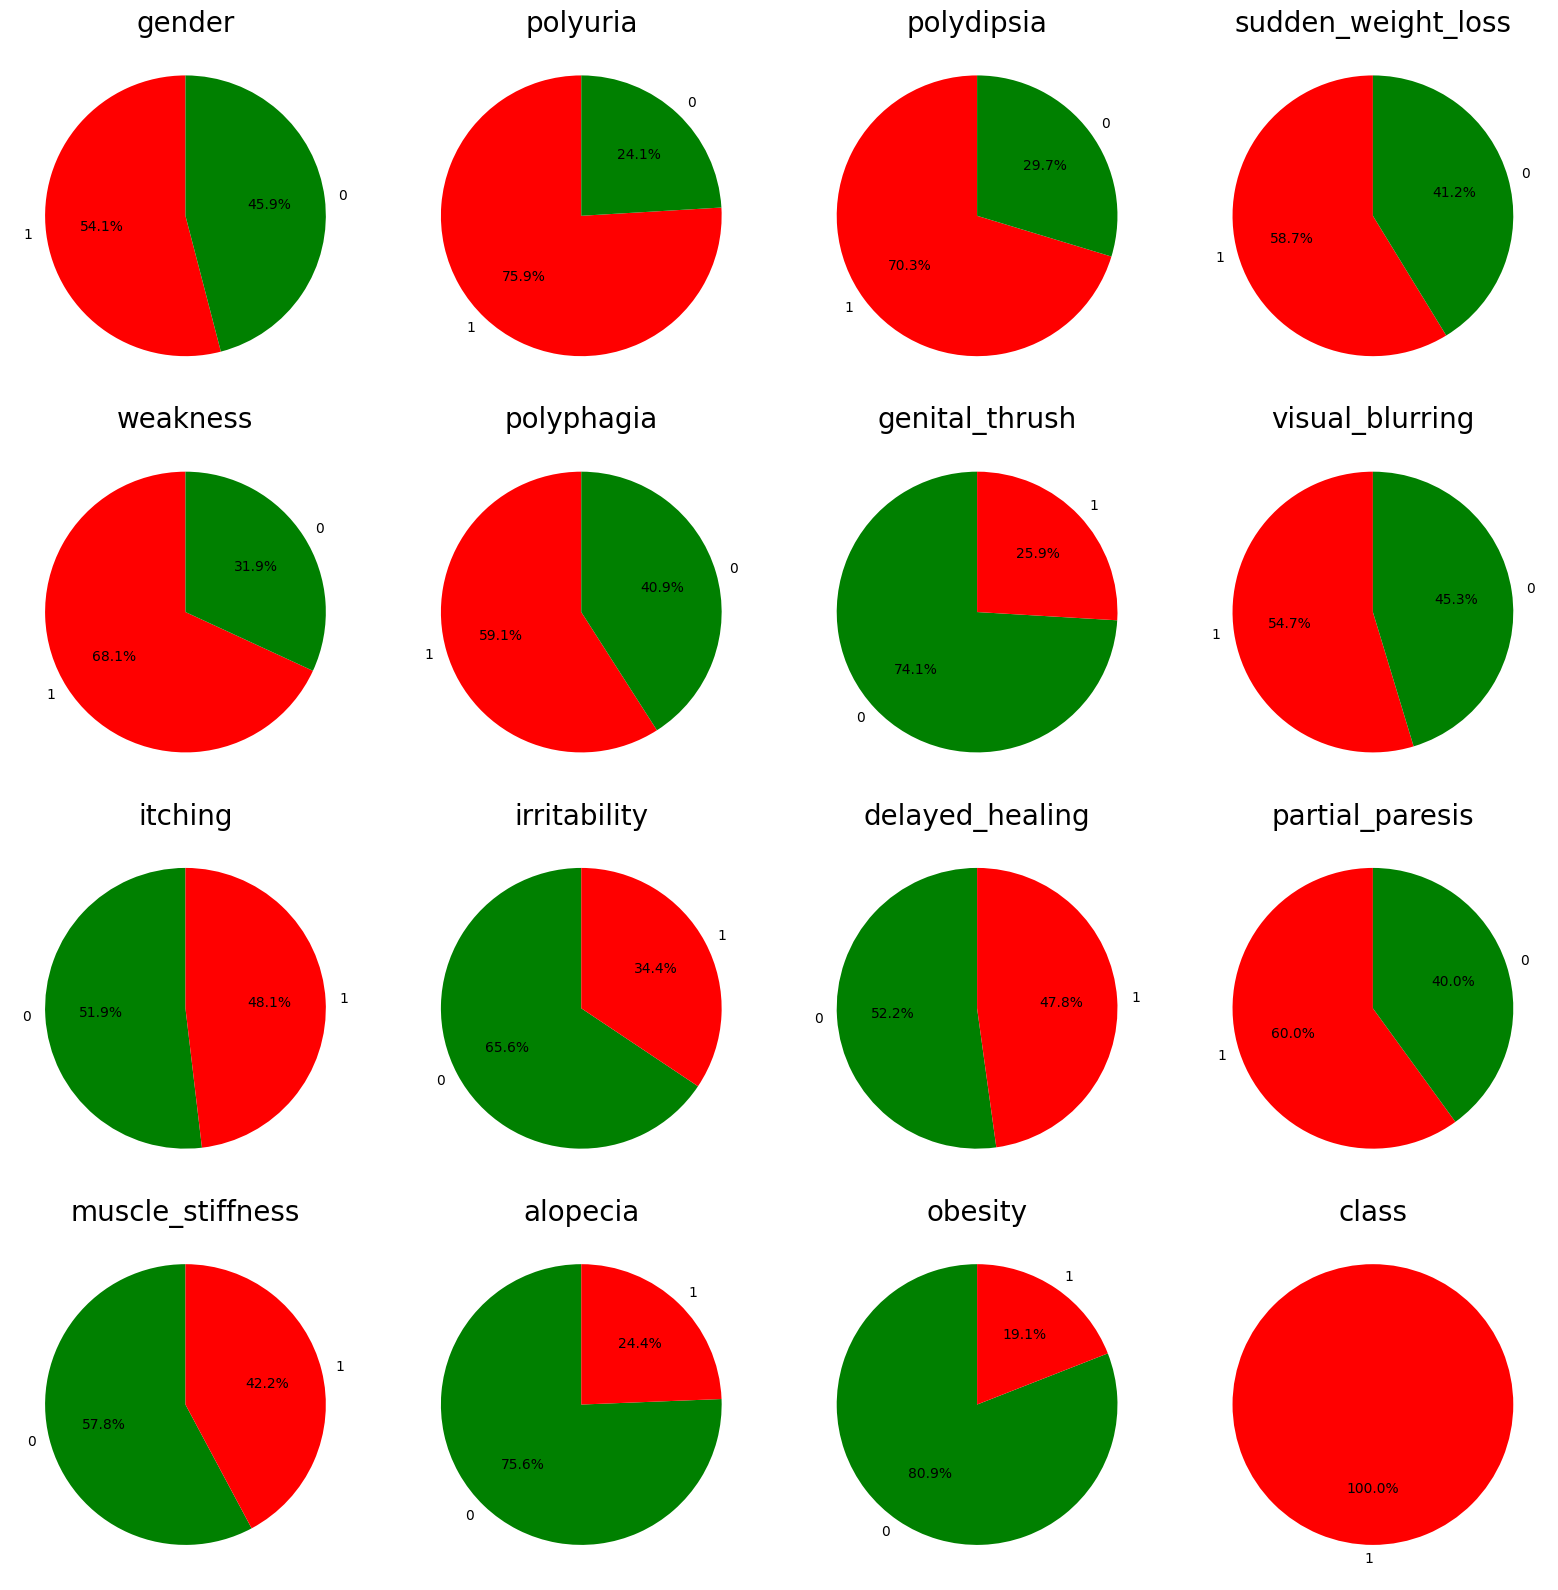

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setup the figure and axes
fig, axes = plt.subplots(4, 4, figsize=(16, 16))
axes = axes.flatten()

# Define custom colors for values 0 and 1
colors = {0: 'green', 1: 'red'}

# Iterate over the columns (excluding 'age')
for i, column in enumerate([col for col in df.columns if col != 'age']):
    counts = df[column].value_counts()

    # Map the colors based on the value
    pie_colors = [colors[val] for val in counts.index]

    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=pie_colors)
    axes[i].set_title(column, fontsize=20)

# Turn off any remaining empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


The final output will be a 4x4 grid of pie charts, each representing the distribution of a specific condition or symptom in your dataset. The pie charts will show the proportion of occurrences for each value (0 and 1) of these conditions.

Red indicates the proportion of patients with the condition (value 1).

Green indicates the proportion of patients without the condition (value 0).

This visualization provides a clear and comprehensive view of how common each condition is within your dataset, helping to identify patterns and trends in the symptoms experienced by the patients.

# Pairplot

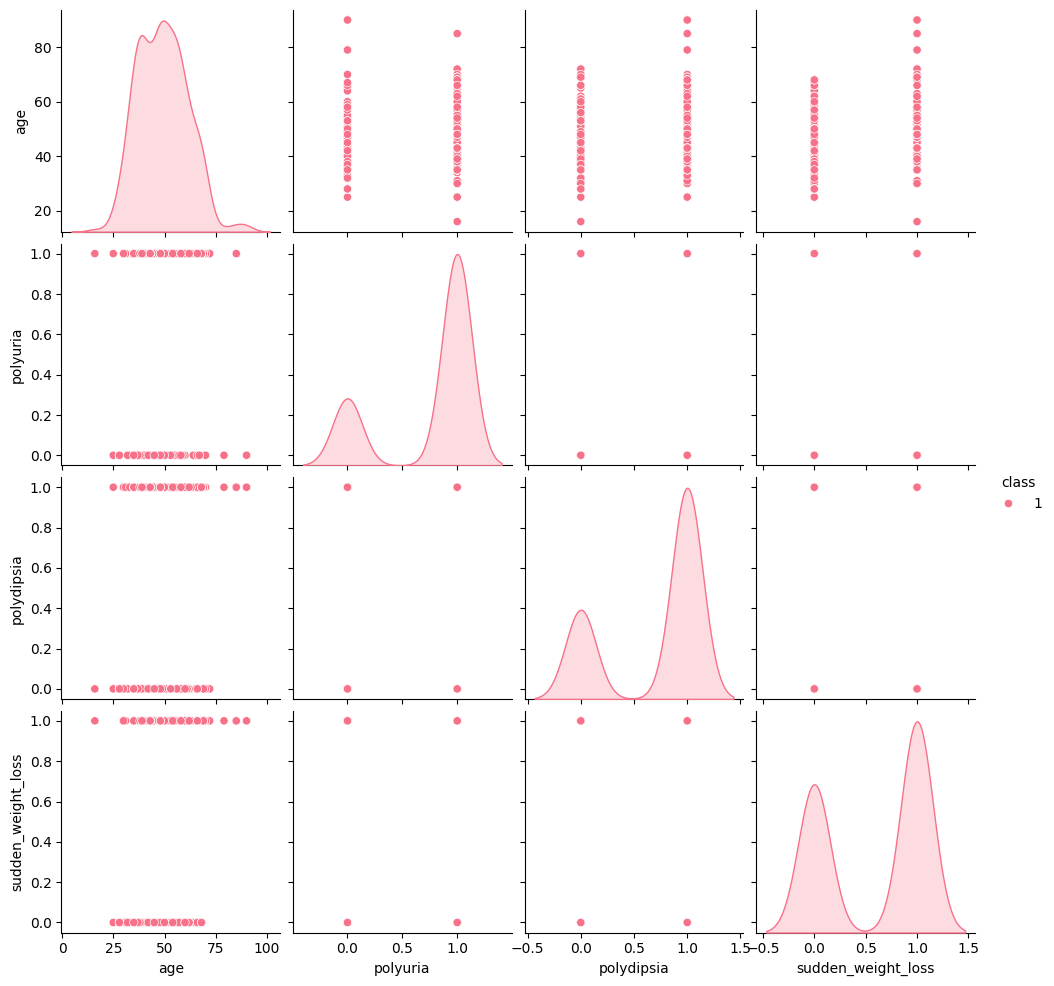

In [143]:
selected_features = ['age', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'class']
sns.pairplot(df[selected_features], hue='class', palette='husl')
plt.show()

The resulting pairplot is a matrix of scatterplots. Each scatterplot shows the relationship between two features from the selected_features list. The main diagonal typically shows the distribution (like histograms) of each feature individually.

Color Coding: Points are color-coded based on the class column. For example, one color represents diabetic patients and another represents non-diabetic patients.

Scatterplots: Each off-diagonal plot shows the relationship between two features. For example, one plot might show how age relates to polyuria, while another might show the relationship between polydipsia and sudden_weight_loss.

Distribution Plots: Diagonal plots often display the distribution of individual features.

This visualization helps you:

Identify patterns and correlations between features.

Understand how different variables interact with respect to the diabetes status.

Spot clusters or trends that can be important for further analysis or modeling.

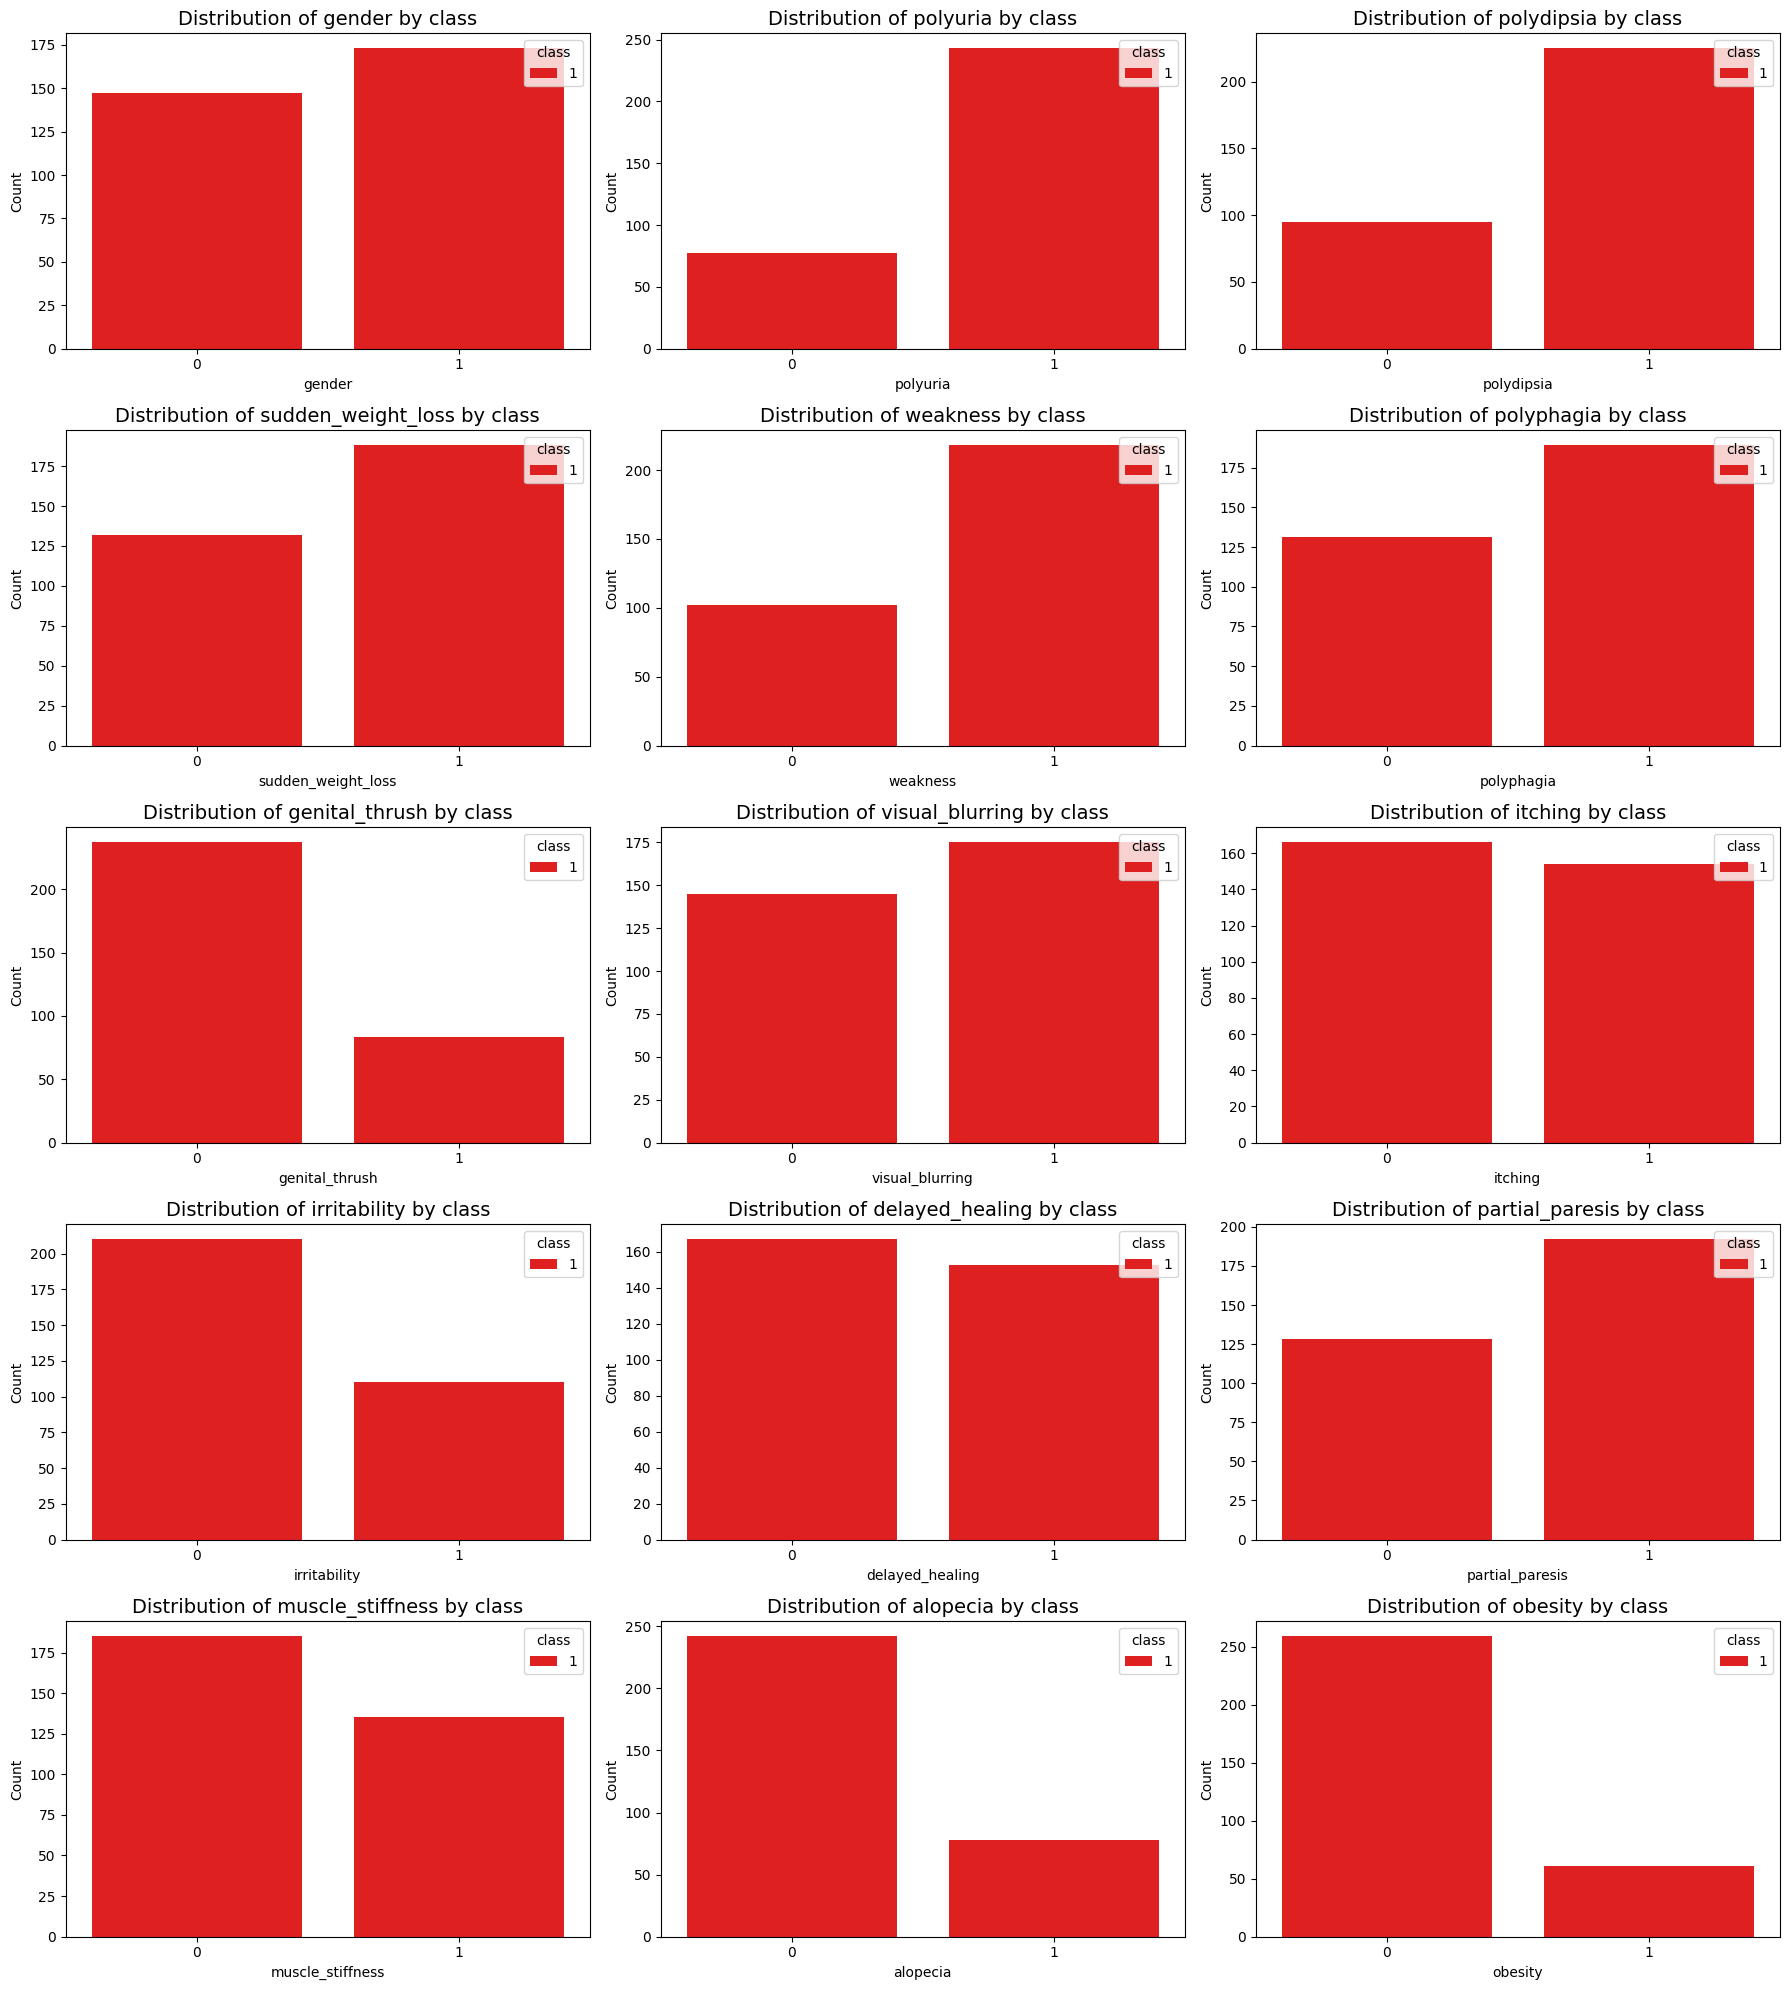

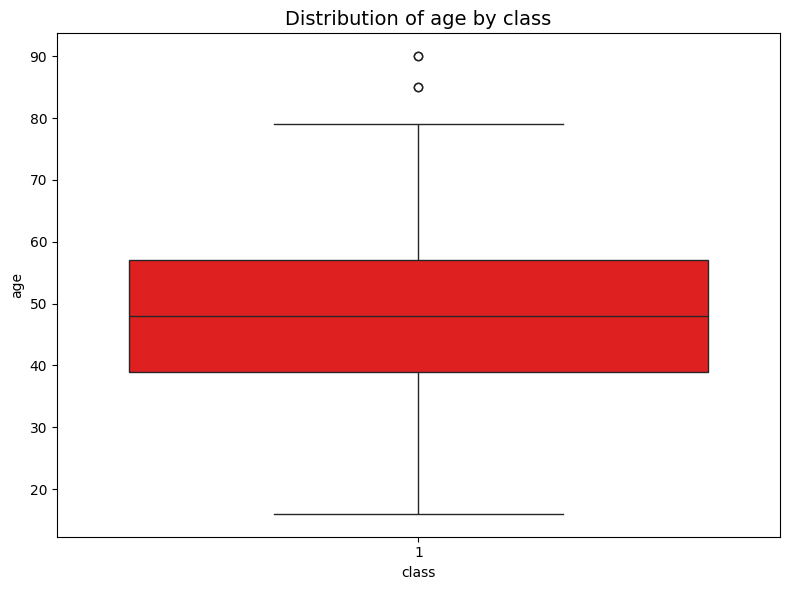

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

target_column = 'class'

# Define lists for categorical and numerical columns
categorical_columns = ['gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness',
                       'polyphagia', 'genital_thrush', 'visual_blurring', 'itching', 'irritability',
                       'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity']
numerical_columns = ['age']

# Set up subplots for categorical variables
n_cols = 3
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculate required rows based on number of columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))

# Custom palette for class values
palette = {0: 'green', 1: 'red', '0': 'green', '1': 'red'}

# Plot each categorical column with respect to the target column
for i, col in enumerate(categorical_columns):
    row = i // n_cols
    col_idx = i % n_cols
    ax = axes[row, col_idx]

    sns.countplot(data=df, x=col, hue=target_column, palette=palette, ax=ax)
    ax.set_title(f'Distribution of {col} by {target_column}', fontsize=14)
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

    # Set consistent legend position
    ax.legend(title=target_column, loc='upper right')

# Remove any empty subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

# Set up subplots for numerical columns
fig, axes = plt.subplots(1, len(numerical_columns), figsize=(8 * len(numerical_columns), 6))

# If there's only one numerical column, make axes a list for consistent indexing
if len(numerical_columns) == 1:
    axes = [axes]

# Plot each numerical column with respect to the target column
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=df, x=target_column, y=col, hue=target_column, palette=palette, ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by {target_column}', fontsize=14)
    axes[i].set_xlabel(target_column)
    axes[i].set_ylabel(col)
    axes[i].legend([],[], frameon=False)

plt.tight_layout()
plt.show()


The output will be a series of visualizations that show how each categorical and numerical variable is distributed with respect to the diabetes status (or whatever the target column represents). This helps in understanding how different features relate to the target variable, which can be valuable for further analysis and model building.

Categorical Features: Count plots showing the distribution of each categorical feature split by the target class, with bars colored according to the class values.

Numerical Features: Box plots showing the distribution of each numerical feature split by the target class, helping to visualize the spread and central tendencies.